## Titanic: Machine Learning from Disaster

### The Challenge

The sinking of the Titanic is one of the most infamous shipwrecks in history.

On April 15, 1912, during her maiden voyage, the widely considered “unsinkable” RMS Titanic sank after colliding with an iceberg. Unfortunately, there weren’t enough lifeboats for everyone onboard, resulting in the death of 1502 out of 2224 passengers and crew.

While there was some element of luck involved in surviving, it seems some groups of people were more likely to survive than others.

In this challenge, we ask you to build a predictive model that answers the question: “what sorts of people were more likely to survive?” using passenger data (ie name, age, gender, socio-economic class, etc). 

### Data Dictionary

* **survival**: Survival (0 = No, 1 = Yes)
* **pclass**:	Ticket class (1 = 1st, 2 = 2nd, 3 = 3rd)
* **sex**: Sex 	
* **Age**: Age in years 	
* **sibsp**: # of siblings / spouses aboard the Titanic 	
* **parch**: # of parents / children aboard the Titanic 	
* **ticket**: Ticket number 	
* **fare**: Passenger fare 	
* **cabin**: Cabin number 	
* **embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msngo

import funciones as func

import warnings
warnings.filterwarnings('ignore')

## Data Analysis

In [31]:
df = pd.read_csv("Data/train.csv")

In [32]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [34]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


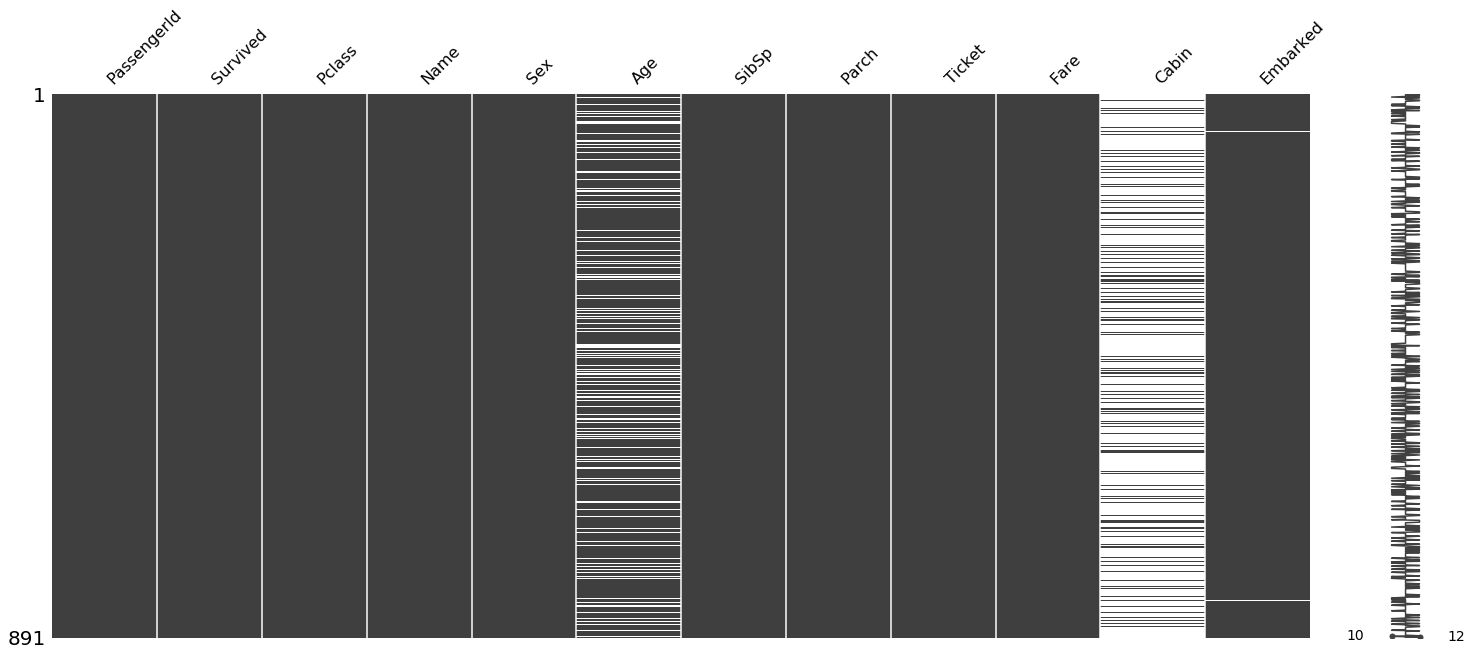

In [35]:
msngo.matrix(df)

In [36]:
df = df.drop(columns='Cabin')

In [37]:
df['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [41]:
df['Embarked'].fillna(df['Embarked'].value_counts().index[0], inplace = True)

In [42]:
df['Age'].fillna(df['Age'].mean(), inplace = True)

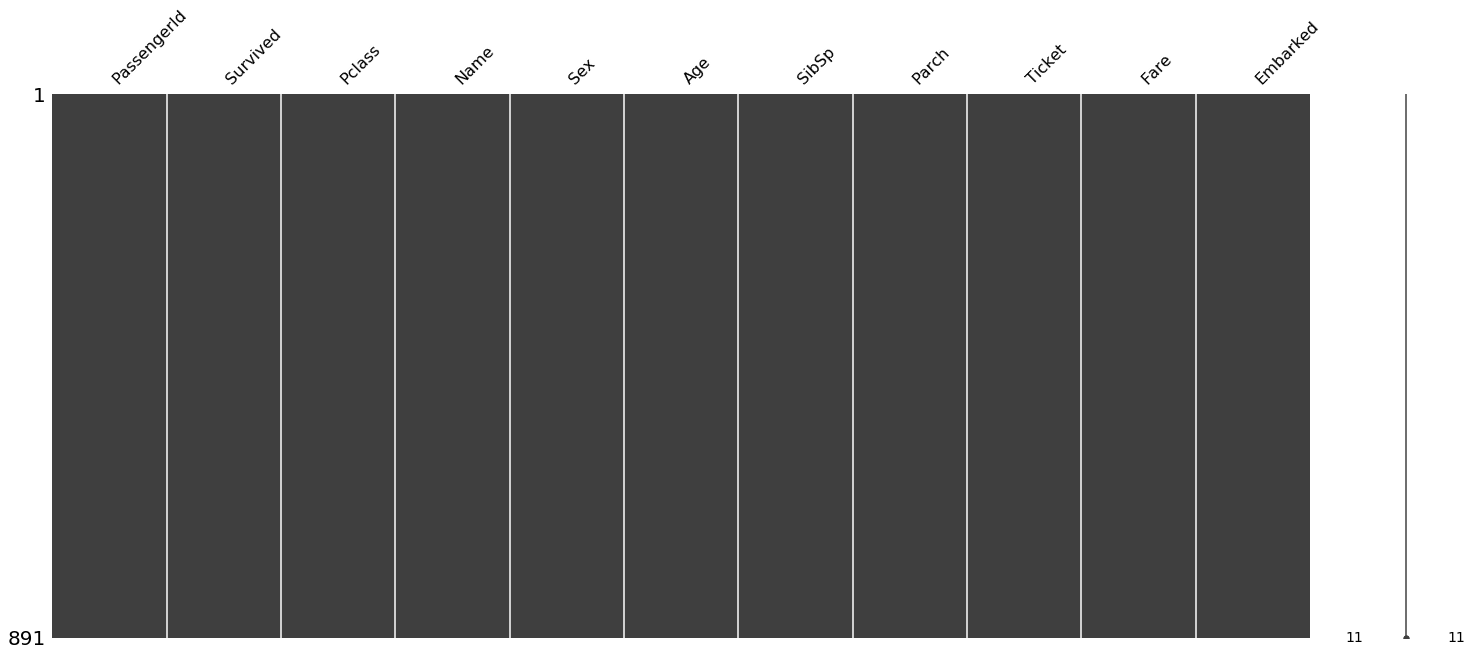

In [43]:
msngo.matrix(df)

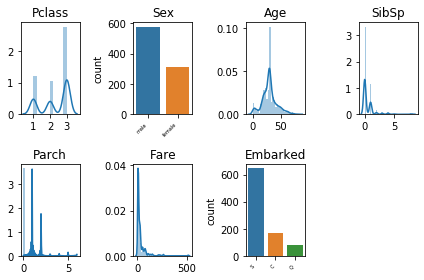

In [45]:
func.graficar_features(df[['Pclass', 'Sex', 'Age', 'SibSp','Parch','Fare','Embarked']])

## Feature Selection

In [57]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

In [61]:
imputer = SimpleImputer()

In [66]:
sex_dummy = pd.get_dummies(df['Sex'], prefix='Sex')
sex_dummy.head()

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


In [67]:
df = pd.concat([df, sex_dummy], axis = 1)

In [68]:
X = df[['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch']]
y = df['Survived']

In [71]:
imputed_X = pd.DataFrame(imputer.fit_transform(X))

In [76]:
X_train, X_valid, y_train, y_valid = train_test_split(imputed_X, y, test_size = 0.33, random_state = 11)

## Creación del Modelo

In [32]:
model = LogisticRegression()

In [77]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [35]:
from sklearn.metrics import classification_report

## Validación del Modelo

In [78]:
y_hat = model.predict(X_valid)

In [79]:
print(classification_report(y_valid, y_hat))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       191
           1       0.74      0.70      0.72       104

    accuracy                           0.81       295
   macro avg       0.79      0.78      0.79       295
weighted avg       0.81      0.81      0.81       295



## Predicciones

In [104]:
df_test = pd.read_csv('test.csv')
y = pd.read_csv('gender_submission.csv')['Survived']

In [93]:
df_test.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Sex_female,Sex_male
404,1296,1,"Frauenthal, Mr. Isaac Gerald",male,43.0,1,0,17765,27.7208,D40,C,0,1
405,1297,2,"Nourney, Mr. Alfred (Baron von Drachstedt"")""",male,20.0,0,0,SC/PARIS 2166,13.8625,D38,C,0,1
407,1299,1,"Widener, Mr. George Dunton",male,50.0,1,1,113503,211.5000,C80,C,0,1
411,1303,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q,1,0
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0


In [92]:
y.tail()

,PassengerId,Survived
413,1305,0
414,1306,1
415,1307,0
416,1308,0
417,1309,0


In [105]:
df_test = pd.concat([df_test, pd.get_dummies(df_test['Sex'], prefix = 'Sex')], axis = 1)

In [106]:
X_test = df_test[['Pclass', 'Sex_female', 'Sex_male', 'Age', 'SibSp', 'Parch']]

In [98]:
X_test.head()

,Pclass,Sex_female,Sex_male,Age,SibSp,Parch
0,3,0,1,34.5,0,0
1,3,1,0,47.0,1,0
2,2,0,1,62.0,0,0
3,3,0,1,27.0,0,0
4,3,1,0,22.0,1,1


In [107]:
imputed_X_test = pd.DataFrame(imputer.fit_transform(X_test))

In [108]:
y_hat_test = model.predict(imputed_X_test)

In [110]:
print(classification_report(y, y_hat_test))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       266
           1       0.95      0.94      0.94       152

    accuracy                           0.96       418
   macro avg       0.96      0.96      0.96       418
weighted avg       0.96      0.96      0.96       418

